# Convolution Matrix filter

## Objectives

* Implement a simple Convolution Matrix filter in python
* Learn how to use tf.nn.conv2d

## Read

https://arxiv.org/pdf/1603.07285v1.pdf
https://docs.gimp.org/en/plug-in-convmatrix.html

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.__version__

'0.12.1'

## Load data
<img align="left" src="files/old.png"> **Old Code**

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


## Get the first 10 images
<img align="left" src="files/new.png"> **New Code**

In [4]:
x_batch, y_true_batch = data.train.next_batch(10)
x = tf.reshape(x_batch, [-1, 28, 28, 1])

## Helper function: plot the result

<img align="left" src="files/new.png"> **New Code:** It is using matplotlib to plot the images

In [5]:
def plot_img(img,size,channels,max_number): 
    
    # create a new figure channels * image
    # squeeze=False, because we want the Axes object to always be a 2D array so we can generalize the code bellow
    fig, ax = plt.subplots(channels ,max_number, squeeze=False)
    
    # iterate through images and channels
    for j in range(0,max_number):
        for i in range(0,channels):
                        
            # transpose twice so we can extract the channel that we want to plot
            temp_img = img[j].transpose()         
            ax[i][j].imshow(temp_img[i].transpose().reshape((size, size)), cmap='gray', interpolation='nearest')
        
            # hide ticks for a cleaner output
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)

    plt.show()

Test the helper function with the first batch of images

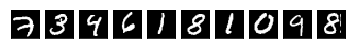

In [6]:
sess = tf.Session()

plot_img(sess.run(x),28,1,10)

## Filter in python

<img align="left" src="files/new.png"> **New Code:** this part can be skipped, just an execrcise

In [7]:
def python_filter(input, image_size, filter_size):
    
    # FOR SIMPLICITY
    
    # images have 1 channel
    # filter_size is assumed odd
    # filter is a square
    # filter is an array of 1s
    
    output = []
    
   
    
    for k in range(0,len(input)):
    
        image = np_img[k].reshape((image_size, image_size))
    
        offset = (filter_size-1)/2
        padding = filter_size - 1
    
        padded_image = np.zeros([len(image)+padding,len(image)+padding])    
        padded_image[offset:image.shape[0]+offset,offset:image.shape[1]+offset] = image
    
        result = np.zeros_like(padded_image, dtype=np.float64)
        
        
        
        
    
        for i in range(offset,len(padded_image)-offset):
            for j in range(offset,len(padded_image[i])-offset):
                for m in range(i-offset,i+offset):
                    for n in range(j-offset,j+offset):
                        result[i][j] = result[i][j] + padded_image[m][n]/(filter_size*filter_size)
     
        
        a = result[offset:image.shape[0]+offset,offset:image.shape[1]+offset]        
        
        a = a.reshape((image_size, image_size, 1))
        
        output.append(a)
        
    return output

Test the filter

In [8]:
np_img = sess.run(x)

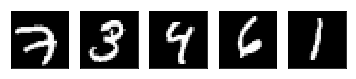

In [9]:
plot_img(np_img,28,1,5)

In [10]:
filtered = python_filter(np_img, 28, 5)

In [11]:
print np.shape(filtered)

(10, 28, 28, 1)


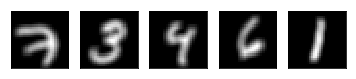

In [12]:
plot_img(filtered,28,1,5)

## Use the Tensorflow tf.nn.conv2d for applying a filter

<img align="left" src="files/new.png"> **New Code:**

In [13]:
def filter(input, filter_size, in_channels, out_channels):

    filter_shape = [filter_size, filter_size, in_channels, out_channels]
    
    filter = tf.ones(filter_shape)
    
    output = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME')
    
    return output

Test the filter

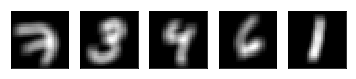

In [14]:
filtered_image = filter(x, 5, 1, 1)

sess.run(tf.global_variables_initializer())
plot_img(sess.run(filtered_image),28,1,5)

## Add bias
<img align="left" src="files/modified.png"> **Modified:**

In [15]:
def filter(input, filter_size, in_channels, out_channels):

    filter_shape = [filter_size, filter_size, in_channels, out_channels]
    biases_shape = [out_channels]    
    
    filter = tf.ones(filter_shape)
    biases = tf.ones(biases_shape)
    
    output = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME') + biases
    
    return output

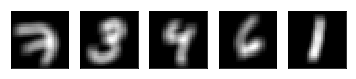

In [16]:
filtered_image = filter(x, 5, 1, 1)

sess.run(tf.global_variables_initializer())
plot_img(sess.run(filtered_image),28,1,5)

## Randomly initiated filter

<img align="left" src="files/modified.png"> **Modified:**

In [17]:
def filter(input, filter_size, in_channels, out_channels):

    filter_shape = [filter_size, filter_size, in_channels, out_channels]
    biases_shape = [out_channels]    
    
    filter = tf.Variable(tf.truncated_normal(filter_shape))
    biases = tf.Variable(tf.truncated_normal(biases_shape))
    
    output = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME') + biases
    
    return output

Test the filter

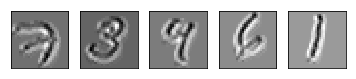

In [18]:
filtered_image = filter(x, 5, 1, 1)

sess.run(tf.global_variables_initializer())
plot_img(sess.run(filtered_image),28,1,5)

## Deeper filter

<img align="left" src="files/old.png"> **Same code:**

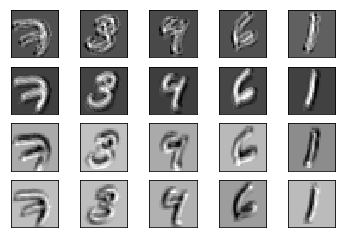

In [19]:
filtered_image = filter(x, 5, 1, 4)

sess.run(tf.global_variables_initializer())
plot_img(sess.run(filtered_image),28,4,5)